# Mobile Price Classification 
### Classify Mobile Price Range
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.
Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.
In this problem you do not have to predict actual price but a price range indicating how high the price is [More..](https://github.com/Eng-Omar-Hussein/Predict_Mobile_Price/tree/main)

## Data Cleaning & Pre-processing

In [223]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib as plt

In [3]:
df = pd.read_csv("phone_data.csv")
df

,Brand,title,storage,Ram,Front Camera,Battery,Resolutions,OS,Inches,price in EGY
0,Honor,x7a,128,4,8,5000,720 x 1600,Android,6.8,7666
1,Apple,iPhone 13,128,4,12,3000,1170 x 2532,iOS,6.1,33333
2,Samsung,Galaxy A14,128,4,13,4000,1080 x 2408,Android,6.6,5899
3,Vivo,Y27,128,6,8,4000,1080 x 2388,Android,6.6,7790
4,iKU,S2,Less,NaN,Not,Below,NaN,NaN,1.8,580
...,...,...,...,...,...,...,...,...,...,...
829,Samsung,Galaxy A54,256,8,32,4000,1080 x 2340,Android,6.4,17399
830,Samsung,Galaxy A54,128,8,32,4000,1080 x 2340,Android,6.4,17600
831,Samsung,Galaxy A54,128,8,32,4000,1080 x 2340,Android,6.4,17600
832,Xiaomi,Redmi Note 12 Pro Plus,256,8,16,4000,1080x2400,Android,6.6,15700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         834 non-null    object 
 1   title         834 non-null    object 
 2   storage       833 non-null    object 
 3   Ram           802 non-null    object 
 4   Front Camera  829 non-null    object 
 5   Battery       818 non-null    object 
 6   Resolutions   722 non-null    object 
 7   OS            780 non-null    object 
 8   Inches        822 non-null    float64
 9   price in EGY  834 non-null    int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 65.3+ KB


In [4]:
df["Ram"].value_counts()
# here we need to remove GB

Ram
4       266
8       195
6        94
2        79
3        70
12       36
Less     21
32       20
1        13
256       3
8GB       1
512       1
4GB       1
3GB       1
32MB      1
Name: count, dtype: int64

In [5]:
df = df.drop("title", axis=1)

In [6]:
df

,Brand,storage,Ram,Front Camera,Battery,Resolutions,OS,Inches,price in EGY
0,Honor,128,4,8,5000,720 x 1600,Android,6.8,7666
1,Apple,128,4,12,3000,1170 x 2532,iOS,6.1,33333
2,Samsung,128,4,13,4000,1080 x 2408,Android,6.6,5899
3,Vivo,128,6,8,4000,1080 x 2388,Android,6.6,7790
4,iKU,Less,NaN,Not,Below,NaN,NaN,1.8,580
...,...,...,...,...,...,...,...,...,...
829,Samsung,256,8,32,4000,1080 x 2340,Android,6.4,17399
830,Samsung,128,8,32,4000,1080 x 2340,Android,6.4,17600
831,Samsung,128,8,32,4000,1080 x 2340,Android,6.4,17600
832,Xiaomi,256,8,16,4000,1080x2400,Android,6.6,15700


In [7]:
pd.get_dummies(df['Brand']).astype(int)

,Ace,Apple,Benco,Blackview,Darago,Google,HTC,Honor,Huawei,Infinix,...,Oppo,Samsung,Tecno,Unitronics,Vivo,Xiaomi,Xtouch,iKU,iTel,realme
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
830,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
831,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
df = df.join(pd.get_dummies(df['Brand']).astype(int))

In [9]:
df = df.drop('Brand', axis=1)

In [10]:
df

,storage,Ram,Front Camera,Battery,Resolutions,OS,Inches,price in EGY,Ace,Apple,...,Oppo,Samsung,Tecno,Unitronics,Vivo,Xiaomi,Xtouch,iKU,iTel,realme
0,128,4,8,5000,720 x 1600,Android,6.8,7666,0,0,...,0,0,0,0,0,0,0,0,0,0
1,128,4,12,3000,1170 x 2532,iOS,6.1,33333,0,1,...,0,0,0,0,0,0,0,0,0,0
2,128,4,13,4000,1080 x 2408,Android,6.6,5899,0,0,...,0,1,0,0,0,0,0,0,0,0
3,128,6,8,4000,1080 x 2388,Android,6.6,7790,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Less,NaN,Not,Below,NaN,NaN,1.8,580,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,256,8,32,4000,1080 x 2340,Android,6.4,17399,0,0,...,0,1,0,0,0,0,0,0,0,0
830,128,8,32,4000,1080 x 2340,Android,6.4,17600,0,0,...,0,1,0,0,0,0,0,0,0,0
831,128,8,32,4000,1080 x 2340,Android,6.4,17600,0,0,...,0,1,0,0,0,0,0,0,0,0
832,256,8,16,4000,1080x2400,Android,6.6,15700,0,0,...,0,0,0,0,0,1,0,0,0,0


### need to remove any dublicated rows

In [11]:
df.duplicated().value_counts()

False    619
True     215
Name: count, dtype: int64

In [12]:
df = df.drop_duplicates()
df

,storage,Ram,Front Camera,Battery,Resolutions,OS,Inches,price in EGY,Ace,Apple,...,Oppo,Samsung,Tecno,Unitronics,Vivo,Xiaomi,Xtouch,iKU,iTel,realme
0,128,4,8,5000,720 x 1600,Android,6.8,7666,0,0,...,0,0,0,0,0,0,0,0,0,0
1,128,4,12,3000,1170 x 2532,iOS,6.1,33333,0,1,...,0,0,0,0,0,0,0,0,0,0
2,128,4,13,4000,1080 x 2408,Android,6.6,5899,0,0,...,0,1,0,0,0,0,0,0,0,0
3,128,6,8,4000,1080 x 2388,Android,6.6,7790,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Less,NaN,Not,Below,NaN,NaN,1.8,580,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,256,8,32,4000,1080 x 2340,Android,6.4,15000,0,0,...,0,1,0,0,0,0,0,0,0,0
829,256,8,32,4000,1080 x 2340,Android,6.4,17399,0,0,...,0,1,0,0,0,0,0,0,0,0
830,128,8,32,4000,1080 x 2340,Android,6.4,17600,0,0,...,0,1,0,0,0,0,0,0,0,0
832,256,8,16,4000,1080x2400,Android,6.6,15700,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
df['Resolutions'].isna().value_counts()

Resolutions
False    533
True      86
Name: count, dtype: int64

In [14]:
df

,storage,Ram,Front Camera,Battery,Resolutions,OS,Inches,price in EGY,Ace,Apple,...,Oppo,Samsung,Tecno,Unitronics,Vivo,Xiaomi,Xtouch,iKU,iTel,realme
0,128,4,8,5000,720 x 1600,Android,6.8,7666,0,0,...,0,0,0,0,0,0,0,0,0,0
1,128,4,12,3000,1170 x 2532,iOS,6.1,33333,0,1,...,0,0,0,0,0,0,0,0,0,0
2,128,4,13,4000,1080 x 2408,Android,6.6,5899,0,0,...,0,1,0,0,0,0,0,0,0,0
3,128,6,8,4000,1080 x 2388,Android,6.6,7790,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Less,NaN,Not,Below,NaN,NaN,1.8,580,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,256,8,32,4000,1080 x 2340,Android,6.4,15000,0,0,...,0,1,0,0,0,0,0,0,0,0
829,256,8,32,4000,1080 x 2340,Android,6.4,17399,0,0,...,0,1,0,0,0,0,0,0,0,0
830,128,8,32,4000,1080 x 2340,Android,6.4,17600,0,0,...,0,1,0,0,0,0,0,0,0,0
832,256,8,16,4000,1080x2400,Android,6.6,15700,0,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
df['storage'] = df['storage'].str.replace('Less', '32')

C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\43615687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['storage'] = df['storage'].str.replace('Less', '32')


In [16]:
df['storage'] = df['storage'].str.replace('Unidentified', '32')


C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\3562284517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['storage'] = df['storage'].str.replace('Unidentified', '32')


In [17]:
df

,storage,Ram,Front Camera,Battery,Resolutions,OS,Inches,price in EGY,Ace,Apple,...,Oppo,Samsung,Tecno,Unitronics,Vivo,Xiaomi,Xtouch,iKU,iTel,realme
0,128,4,8,5000,720 x 1600,Android,6.8,7666,0,0,...,0,0,0,0,0,0,0,0,0,0
1,128,4,12,3000,1170 x 2532,iOS,6.1,33333,0,1,...,0,0,0,0,0,0,0,0,0,0
2,128,4,13,4000,1080 x 2408,Android,6.6,5899,0,0,...,0,1,0,0,0,0,0,0,0,0
3,128,6,8,4000,1080 x 2388,Android,6.6,7790,0,0,...,0,0,0,0,1,0,0,0,0,0
4,32,NaN,Not,Below,NaN,NaN,1.8,580,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,256,8,32,4000,1080 x 2340,Android,6.4,15000,0,0,...,0,1,0,0,0,0,0,0,0,0
829,256,8,32,4000,1080 x 2340,Android,6.4,17399,0,0,...,0,1,0,0,0,0,0,0,0,0
830,128,8,32,4000,1080 x 2340,Android,6.4,17600,0,0,...,0,1,0,0,0,0,0,0,0,0
832,256,8,16,4000,1080x2400,Android,6.6,15700,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
df['Ram'].isnull().value_counts()

Ram
False    591
True      28
Name: count, dtype: int64

In [19]:
df['Ram'] = df['Ram'].str.replace('Less', '8')

C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\398172859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram'] = df['Ram'].str.replace('Less', '8')


In [27]:
df['Ram'] = df['Ram'].str.replace('GB', '')

C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\1346046105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram'] = df['Ram'].str.replace('GB', '')


In [31]:
df['Ram'] = df['Ram'].fillna(value=8)

C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\211532151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram'] = df['Ram'].fillna(value=8)


In [32]:
df['Ram'] = df['Ram'].astype(int)

C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\974961220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram'] = df['Ram'].astype(int)


In [33]:
df['storage'].isnull().sum()

1

In [37]:
df['storage'] = df['storage'].fillna(value=df['storage'].mean())

C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\2579007408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['storage'] = df['storage'].fillna(value=df['storage'].mean())


In [38]:
df['storage'] = df['storage'].astype(int)

C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\2951169149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['storage'] = df['storage'].astype(int)


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619 entries, 0 to 833
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   storage       619 non-null    int32  
 1   Ram           619 non-null    int32  
 2   Front Camera  619 non-null    int32  
 3   Battery       619 non-null    int32  
 4   Resolutions   533 non-null    object 
 5   Inches        619 non-null    float64
 6   price in EGY  619 non-null    int64  
 7   Ace           619 non-null    int32  
 8   Apple         619 non-null    int32  
 9   Benco         619 non-null    int32  
 10  Blackview     619 non-null    int32  
 11  Darago        619 non-null    int32  
 12  Google        619 non-null    int32  
 13  HTC           619 non-null    int32  
 14  Honor         619 non-null    int32  
 15  Huawei        619 non-null    int32  
 16  Infinix       619 non-null    int32  
 17  LAVA          619 non-null    int32  
 18  Lenovo        619 non-null    int32

In [54]:
df['Front Camera'].isna().value_counts()

Front Camera
False    615
True       4
Name: count, dtype: int64

In [48]:
df['Front Camera'] = df['Front Camera'].str.replace('Unidentified', '16')
df['Front Camera'] = df['Front Camera'].str.replace('Dual', '12')
df['Front Camera'] = df['Front Camera'].str.replace('10.8', '5')
df['Front Camera'] = df['Front Camera'].str.replace('VGA', '20')

C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\288274825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Front Camera'] = df['Front Camera'].str.replace('Unidentified', '16')
C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\288274825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Front Camera'] = df['Front Camera'].str.replace('Dual', '12')
C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\288274825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [55]:
df['Front Camera'] = df['Front Camera'].fillna(value=16)

C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\3409834878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Front Camera'] = df['Front Camera'].fillna(value=16)


In [51]:
df['Front Camera'] = df['Front Camera'].str.replace('Not', '0')

C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\3618974508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Front Camera'] = df['Front Camera'].str.replace('Not', '0')


In [56]:
df['Front Camera'] = df['Front Camera'].astype(int)

C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\2204941537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Front Camera'] = df['Front Camera'].astype(int)


In [57]:
df['Inches'] = df['Inches'].fillna(value=df['Inches'].mean())

C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\1839413740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Inches'] = df['Inches'].fillna(value=df['Inches'].mean())


In [58]:
df['Inches'].isnull().sum()

0

In [67]:
df['Battery'].isna().value_counts()

Battery
False    619
Name: count, dtype: int64

In [63]:
df['Battery'] = df['Battery'].str.replace('mAh', '')
df['Battery'] = df['Battery'].str.replace('Below', '900')
df['Battery'] = df['Battery'].str.replace('8001-9000', '8000')
df['Battery'] = df['Battery'].str.replace('6001-7000', '6000')

C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\1424570016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Battery'] = df['Battery'].str.replace('mAh', '')
C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\1424570016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Battery'] = df['Battery'].str.replace('Below', '900')
C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\1424570016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [66]:
df['Battery'] = df['Battery'].fillna(value=3500)

C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\398570821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Battery'] = df['Battery'].fillna(value=3500)


In [68]:
df['Battery'] = df['Battery'].astype(int)

C:\Users\alprn\AppData\Local\Temp\ipykernel_21216\2233499542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Battery'] = df['Battery'].astype(int)


In [75]:
df['OS'].value_counts()

OS
Android        512
iOS             84
EMUI            12
Proprietary      5
HarmonyOS        1
Nougat           1
Lollipop         1
Pie              1
Marshmallow      1
Itel             1
Name: count, dtype: int64

In [76]:
df = df.join(pd.get_dummies(df['OS']).astype(int))

In [122]:
df

,storage,Ram,Front Camera,Battery,Inches,price in EGY,Ace,Apple,Benco,Blackview,...,HarmonyOS,Itel,Lollipop,Marshmallow,Nougat,Pie,Proprietary,iOS,Screen width,Screen height
0,128,4,8,5000,6.8,7666,0,0,0,0,...,0,0,0,0,0,0,0,0,720,1600
1,128,4,12,3000,6.1,33333,0,1,0,0,...,0,0,0,0,0,0,0,1,1170,2532
2,128,4,13,4000,6.6,5899,0,0,0,0,...,0,0,0,0,0,0,0,0,1080,2408
3,128,6,8,4000,6.6,7790,0,0,0,0,...,0,0,0,0,0,0,0,0,1080,2388
4,32,8,0,900,1.8,580,0,0,0,0,...,0,0,0,0,0,0,0,0,1080,2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,256,8,32,4000,6.4,15000,0,0,0,0,...,0,0,0,0,0,0,0,0,1080,2340
829,256,8,32,4000,6.4,17399,0,0,0,0,...,0,0,0,0,0,0,0,0,1080,2340
830,128,8,32,4000,6.4,17600,0,0,0,0,...,0,0,0,0,0,0,0,0,1080,2340
832,256,8,16,4000,6.6,15700,0,0,0,0,...,0,0,0,0,0,0,0,0,1080,2400


In [81]:
df = df.drop("OS", axis=1)

In [113]:
df['Resolutions'].isna().value_counts()

Resolutions
False    619
Name: count, dtype: int64

In [101]:
df['Resolutions'] = df['Resolutions'].str.replace('Pixels', '')
df['Resolutions'] = df['Resolutions'].str.replace('(', '')
df['Resolutions'] = df['Resolutions'].str.replace(')', '')
df['Resolutions'] = df['Resolutions'].str.replace('X', 'x')

In [120]:
df['Screen width'] = df['Resolutions'].str.split('x').apply(lambda x: x[0])
df['Screen height'] = df['Resolutions'].str.split('x').apply(lambda x: x[-1])
# مفيش ايرور عملت رن بعد ما مسحت الكولم ده ومش هعمل رن من الاول انا

KeyError: 'Resolutions'

In [114]:
df = df.drop('Resolutions', axis=1)

In [124]:
df

,storage,Ram,Front Camera,Battery,Inches,price in EGY,Ace,Apple,Benco,Blackview,...,HarmonyOS,Itel,Lollipop,Marshmallow,Nougat,Pie,Proprietary,iOS,Screen width,Screen height
0,128,4,8,5000,6.8,7666,0,0,0,0,...,0,0,0,0,0,0,0,0,720,1600
1,128,4,12,3000,6.1,33333,0,1,0,0,...,0,0,0,0,0,0,0,1,1170,2532
2,128,4,13,4000,6.6,5899,0,0,0,0,...,0,0,0,0,0,0,0,0,1080,2408
3,128,6,8,4000,6.6,7790,0,0,0,0,...,0,0,0,0,0,0,0,0,1080,2388
4,32,8,0,900,1.8,580,0,0,0,0,...,0,0,0,0,0,0,0,0,1080,2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,256,8,32,4000,6.4,15000,0,0,0,0,...,0,0,0,0,0,0,0,0,1080,2340
829,256,8,32,4000,6.4,17399,0,0,0,0,...,0,0,0,0,0,0,0,0,1080,2340
830,128,8,32,4000,6.4,17600,0,0,0,0,...,0,0,0,0,0,0,0,0,1080,2340
832,256,8,16,4000,6.6,15700,0,0,0,0,...,0,0,0,0,0,0,0,0,1080,2400


In [125]:
gfg_csv_data = df.to_csv('GG.csv', index = True)

## Exploratory Data Analysis 

In [224]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [225]:
data=pd.read_csv('GG.csv')
data

,Unnamed: 0,storage,Ram,Front Camera,Battery,Inches,price in EGY,Ace,Apple,Benco,...,HarmonyOS,Itel,Lollipop,Marshmallow,Nougat,Pie,Proprietary,iOS,Screen width,Screen height
0,0,128,4,8,5000,6.8,7666,0,0,0,...,0,0,0,0,0,0,0,0,720,1600
1,1,128,4,12,3000,6.1,33333,0,1,0,...,0,0,0,0,0,0,0,1,1170,2532
2,2,128,4,13,4000,6.6,5899,0,0,0,...,0,0,0,0,0,0,0,0,1080,2408
3,3,128,6,8,4000,6.6,7790,0,0,0,...,0,0,0,0,0,0,0,0,1080,2388
4,4,32,8,0,900,1.8,580,0,0,0,...,0,0,0,0,0,0,0,0,1080,2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,828,256,8,32,4000,6.4,15000,0,0,0,...,0,0,0,0,0,0,0,0,1080,2340
615,829,256,8,32,4000,6.4,17399,0,0,0,...,0,0,0,0,0,0,0,0,1080,2340
616,830,128,8,32,4000,6.4,17600,0,0,0,...,0,0,0,0,0,0,0,0,1080,2340
617,832,256,8,16,4000,6.6,15700,0,0,0,...,0,0,0,0,0,0,0,0,1080,2400


In [226]:
data.shape

(619, 43)

In [227]:
data.describe()

,Unnamed: 0,storage,Ram,Front Camera,Battery,Inches,price in EGY,Ace,Apple,Benco,...,Android,EMUI,HarmonyOS,Itel,Lollipop,Marshmallow,Nougat,Pie,Proprietary,iOS
count,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,...,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000
mean,416.893376,129.872375,7.689822,11.788368,3638.449111,6.159456,14129.197092,0.001616,0.142165,0.017771,...,0.827141,0.019386,0.001616,0.001616,0.001616,0.001616,0.001616,0.001616,0.008078,0.135703
std,230.938044,97.953385,25.142521,8.657944,969.239611,1.317004,15583.614510,0.040193,0.349501,0.132223,...,0.378432,0.137989,0.040193,0.040193,0.040193,0.040193,0.040193,0.040193,0.089584,0.342750
min,0.000000,1.000000,1.000000,0.000000,900.000000,0.660000,440.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,231.500000,64.000000,4.000000,5.000000,3500.000000,6.400000,4471.500000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,415.000000,128.000000,6.000000,10.000000,4000.000000,6.500000,7200.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,603.500000,128.000000,8.000000,14.500000,4000.000000,6.600000,17449.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,833.000000,512.000000,512.000000,50.000000,8000.000000,12.900000,80000.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [228]:
data.columns

Index(['Unnamed: 0', 'storage', 'Ram', 'Front Camera', 'Battery', 'Inches',
       'price in EGY', 'Ace', 'Apple', 'Benco', 'Blackview', 'Darago',
       'Google', 'HTC', 'Honor', 'Huawei', 'Infinix', 'LAVA', 'Lenovo',
       'Mtouch', 'Nokia', 'Oppo', 'Samsung', 'Tecno', 'Unitronics', 'Vivo',
       'Xiaomi', 'Xtouch', 'iKU', 'iTel', 'realme', 'Android', 'EMUI',
       'HarmonyOS', 'Itel', 'Lollipop', 'Marshmallow', 'Nougat', 'Pie',
       'Proprietary', 'iOS', 'Screen width', 'Screen height'],
      dtype='object')

In [229]:
data.iloc[:,:17].head()

,Unnamed: 0,storage,Ram,Front Camera,Battery,Inches,price in EGY,Ace,Apple,Benco,Blackview,Darago,Google,HTC,Honor,Huawei,Infinix
0,0,128,4,8,5000,6.8,7666,0,0,0,0,0,0,0,1,0,0
1,1,128,4,12,3000,6.1,33333,0,1,0,0,0,0,0,0,0,0
2,2,128,4,13,4000,6.6,5899,0,0,0,0,0,0,0,0,0,0
3,3,128,6,8,4000,6.6,7790,0,0,0,0,0,0,0,0,0,0
4,4,32,8,0,900,1.8,580,0,0,0,0,0,0,0,0,0,0


In [230]:
data.iloc[:,17:36].head()

,LAVA,Lenovo,Mtouch,Nokia,Oppo,Samsung,Tecno,Unitronics,Vivo,Xiaomi,Xtouch,iKU,iTel,realme,Android,EMUI,HarmonyOS,Itel,Lollipop
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [231]:
data.iloc[:,36:].head()

,Marshmallow,Nougat,Pie,Proprietary,iOS,Screen width,Screen height
0,0,0,0,0,0,720,1600
1,0,0,0,0,1,1170,2532
2,0,0,0,0,0,1080,2408
3,0,0,0,0,0,1080,2388
4,0,0,0,0,0,1080,2400


### Representation of the distribution of data

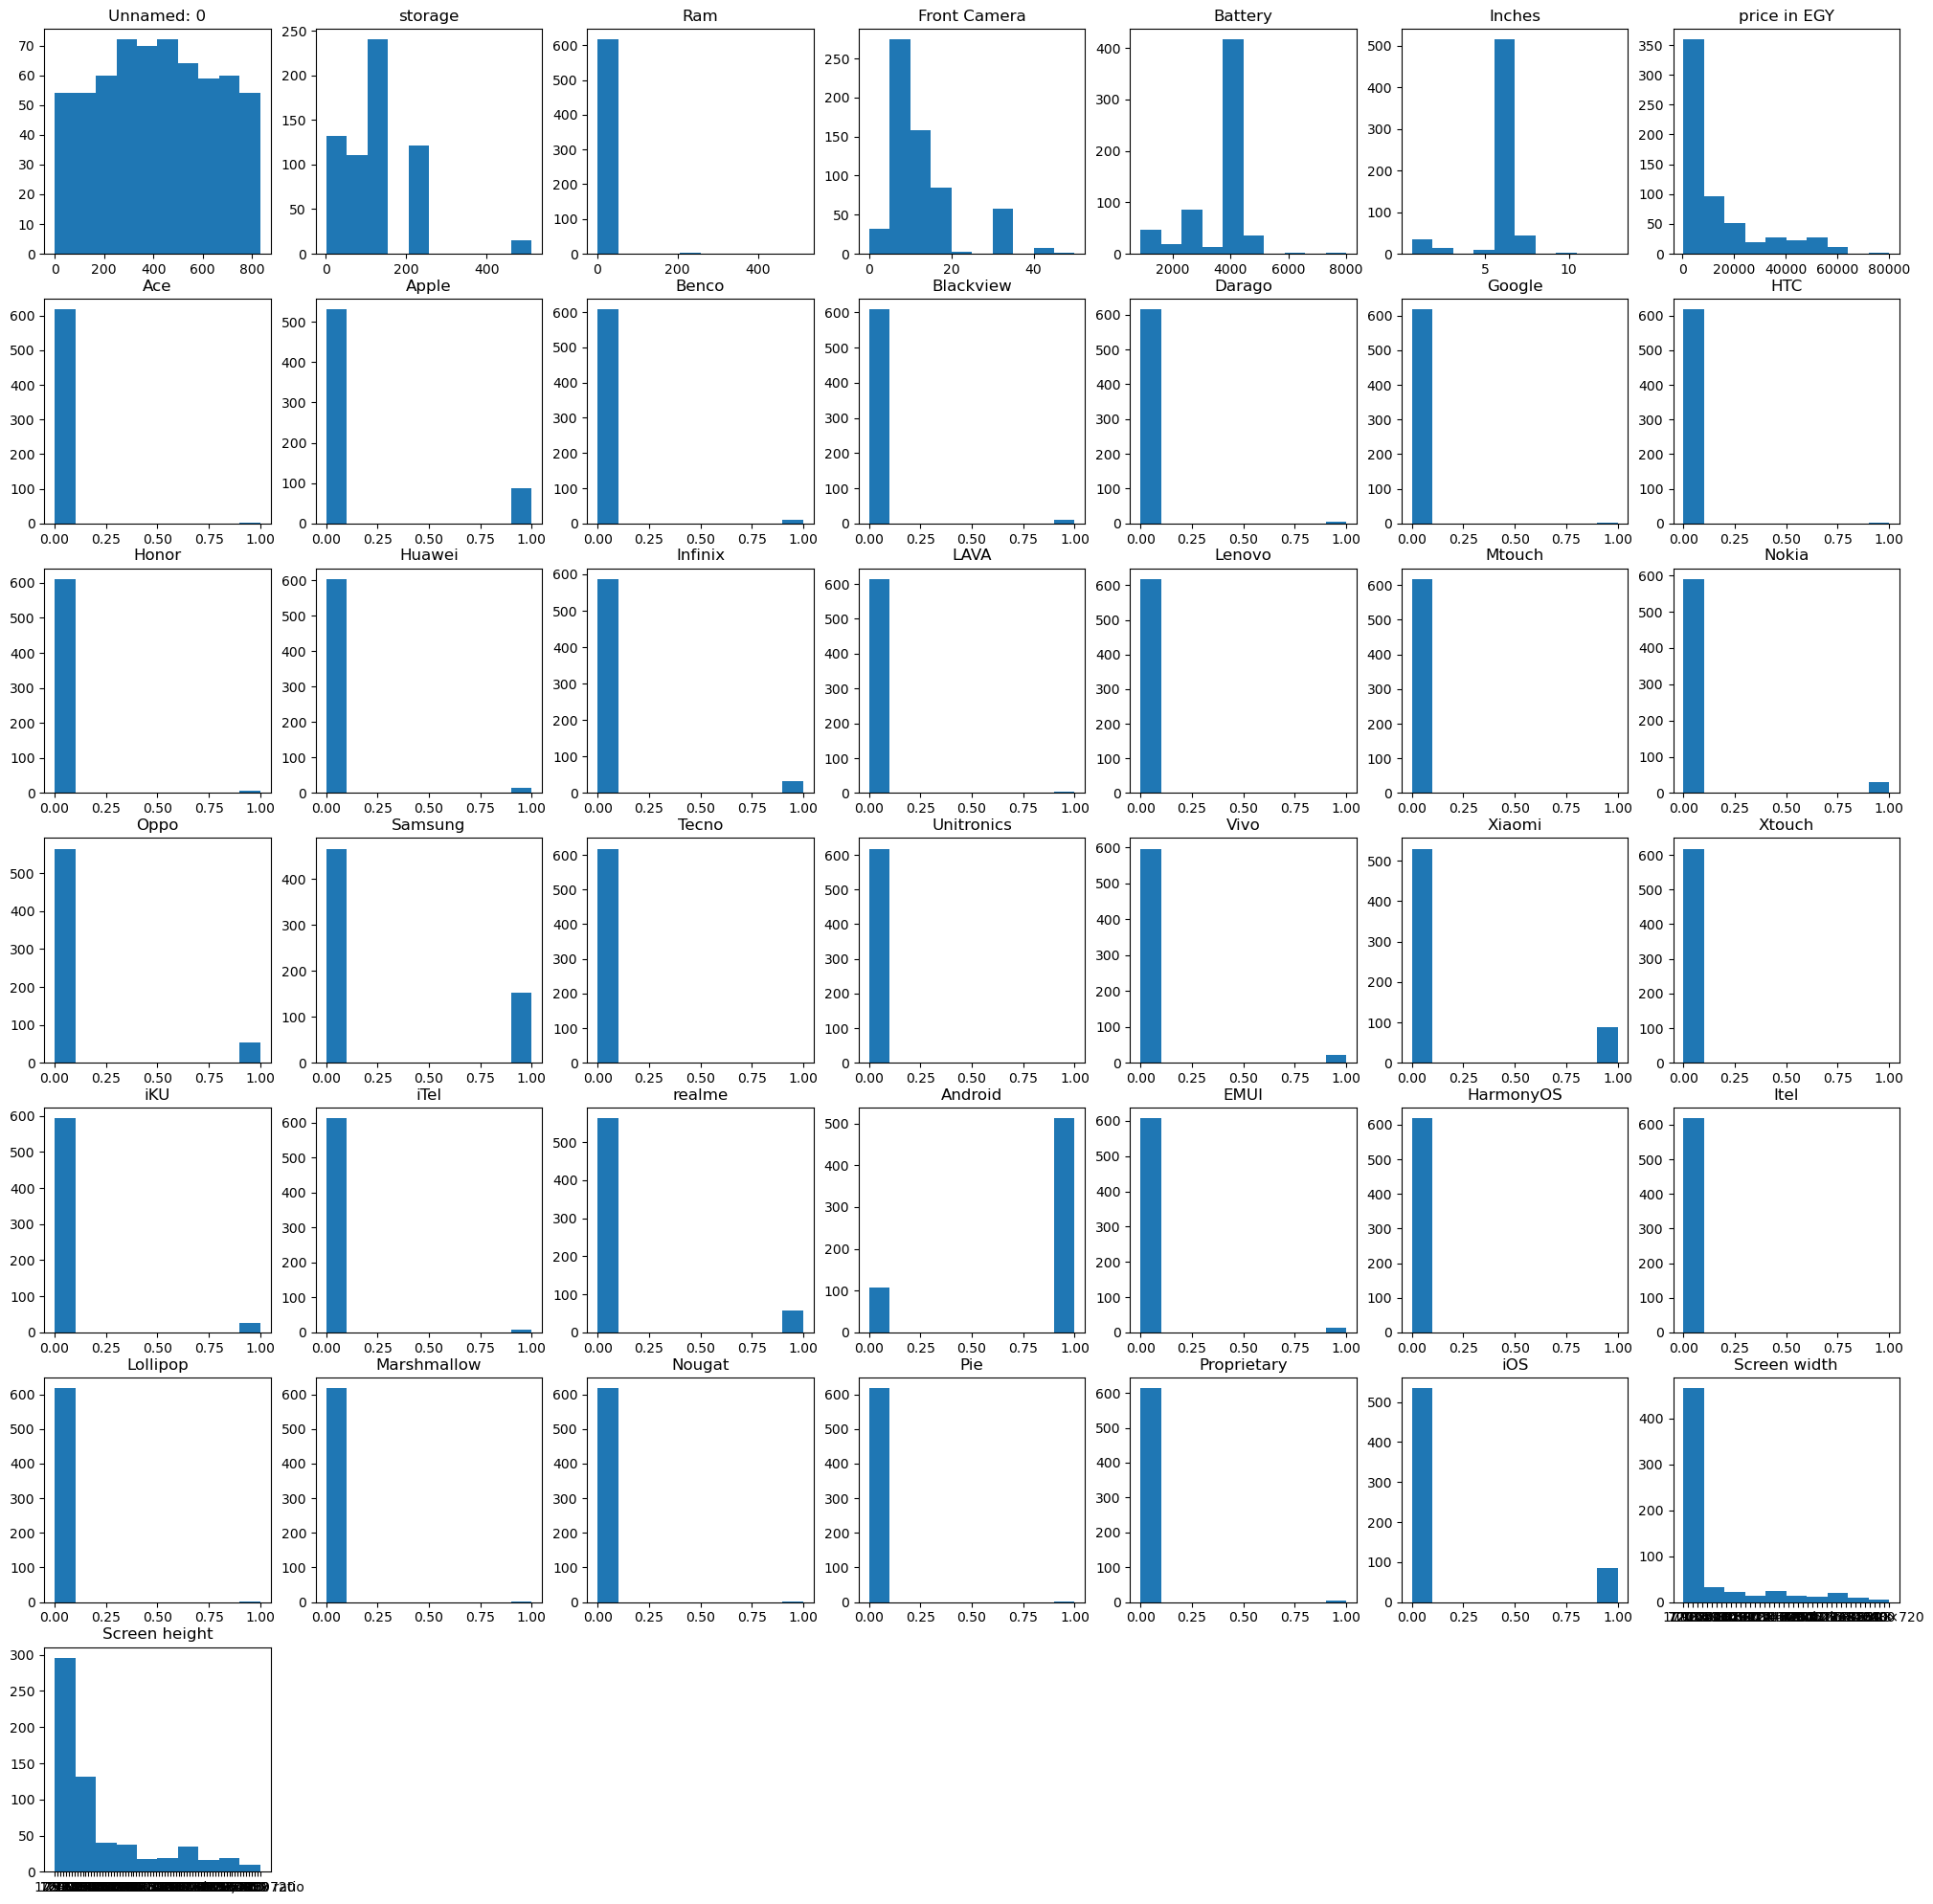

In [232]:
plt.figure(figsize = (25,25))
j = 1
for i in data.columns:
    plt.subplot(7,7,j)
    plt.title(f'{i}')
    plt.hist(data[i])
    j += 1
plt.show()

### Split Category and Continuous data for further use

In [233]:
cat =[]
con =[]
for i in data.columns:
    if data[i].dtype == 'int':
        if data[i].nunique() <= 9:
            cat.append(i)
        else:
            con.append(i)
    else:
        con.append(i)

In [235]:
plt.figure(figsize = (2,2))
for i in cat:
    value = data[i].value_counts()
    label = data[i].unique()
    fig = px.pie(value,label,title = str(i),color_discrete_sequence=px.colors.sequential.BuGn,width=600, height=400)
    fig.show()

<Figure size 200x200 with 0 Axes>

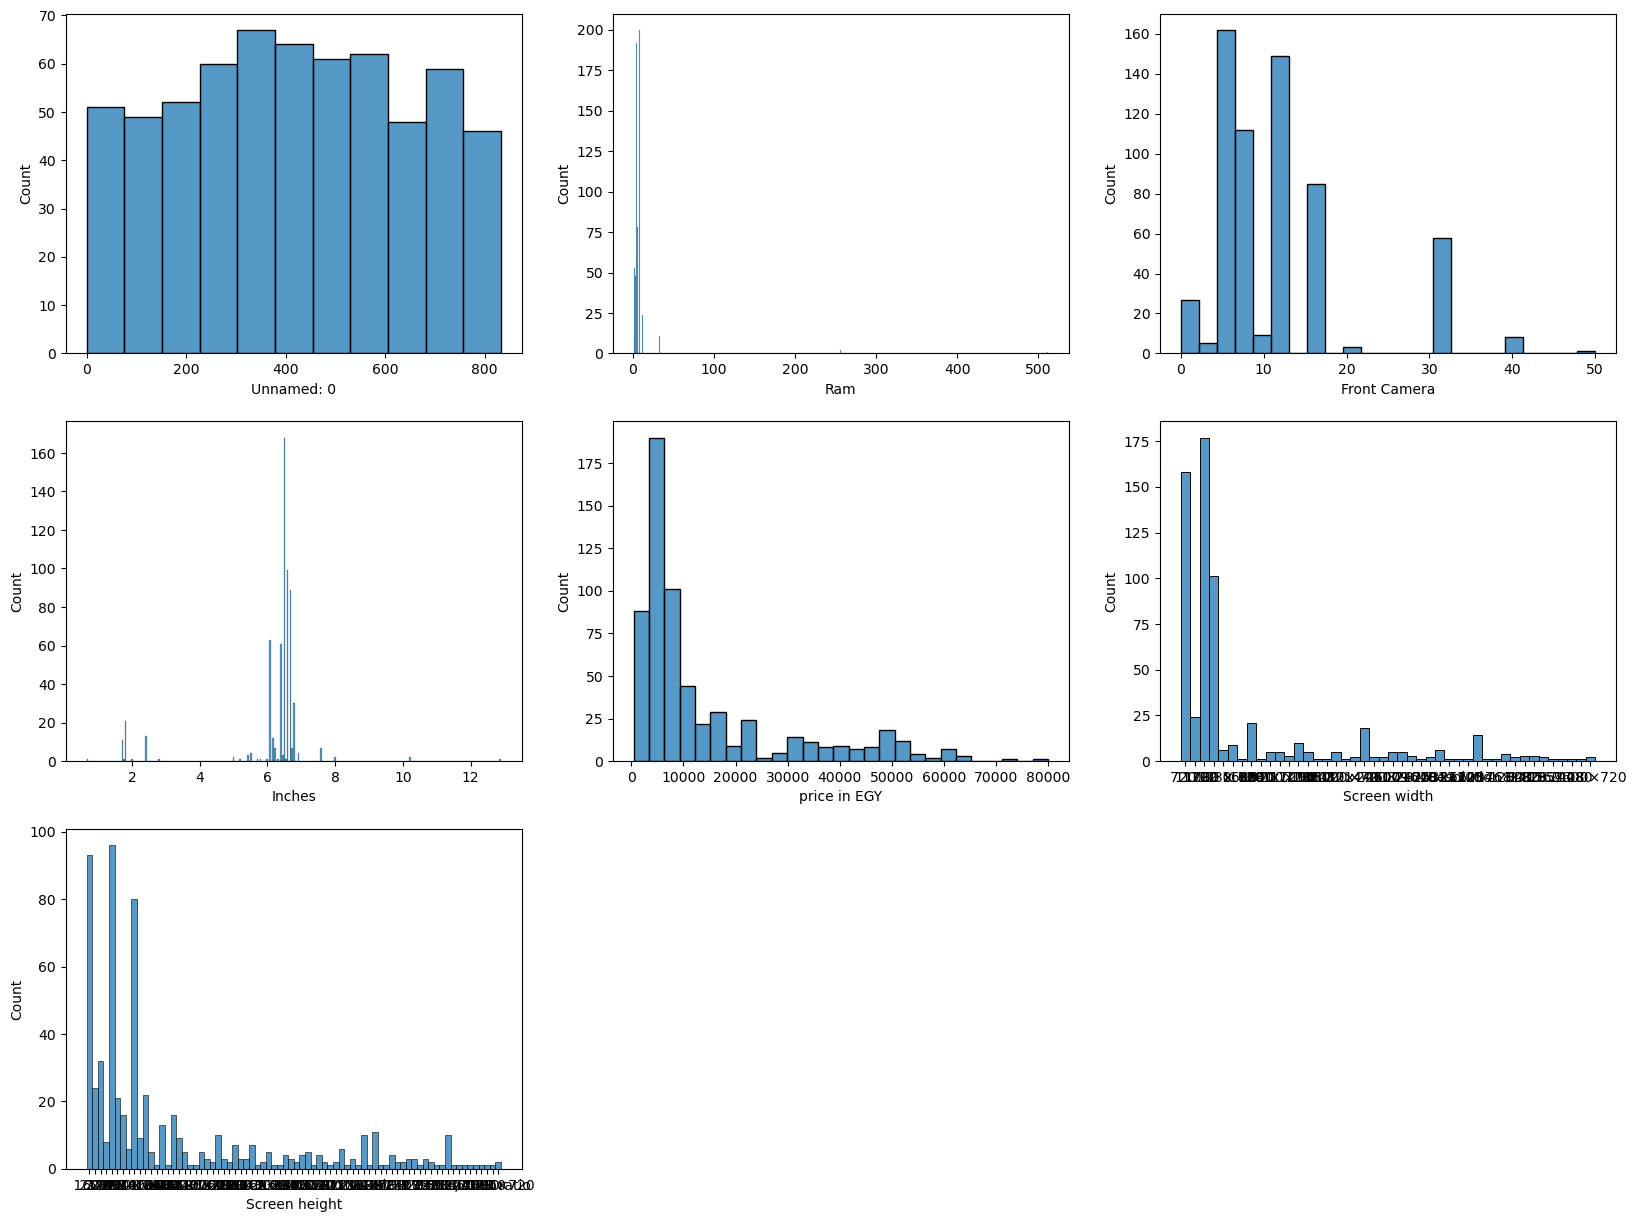

In [236]:
j = 1
plt.figure(figsize = (20,15))
for i in con:
    plt.subplot(3,3,j)
    sns.histplot(x = data[i])
    j += 1
plt.show()

### Relation between ['Battery', 'Ram', 'storage', 'Front Camera'] to price_range 

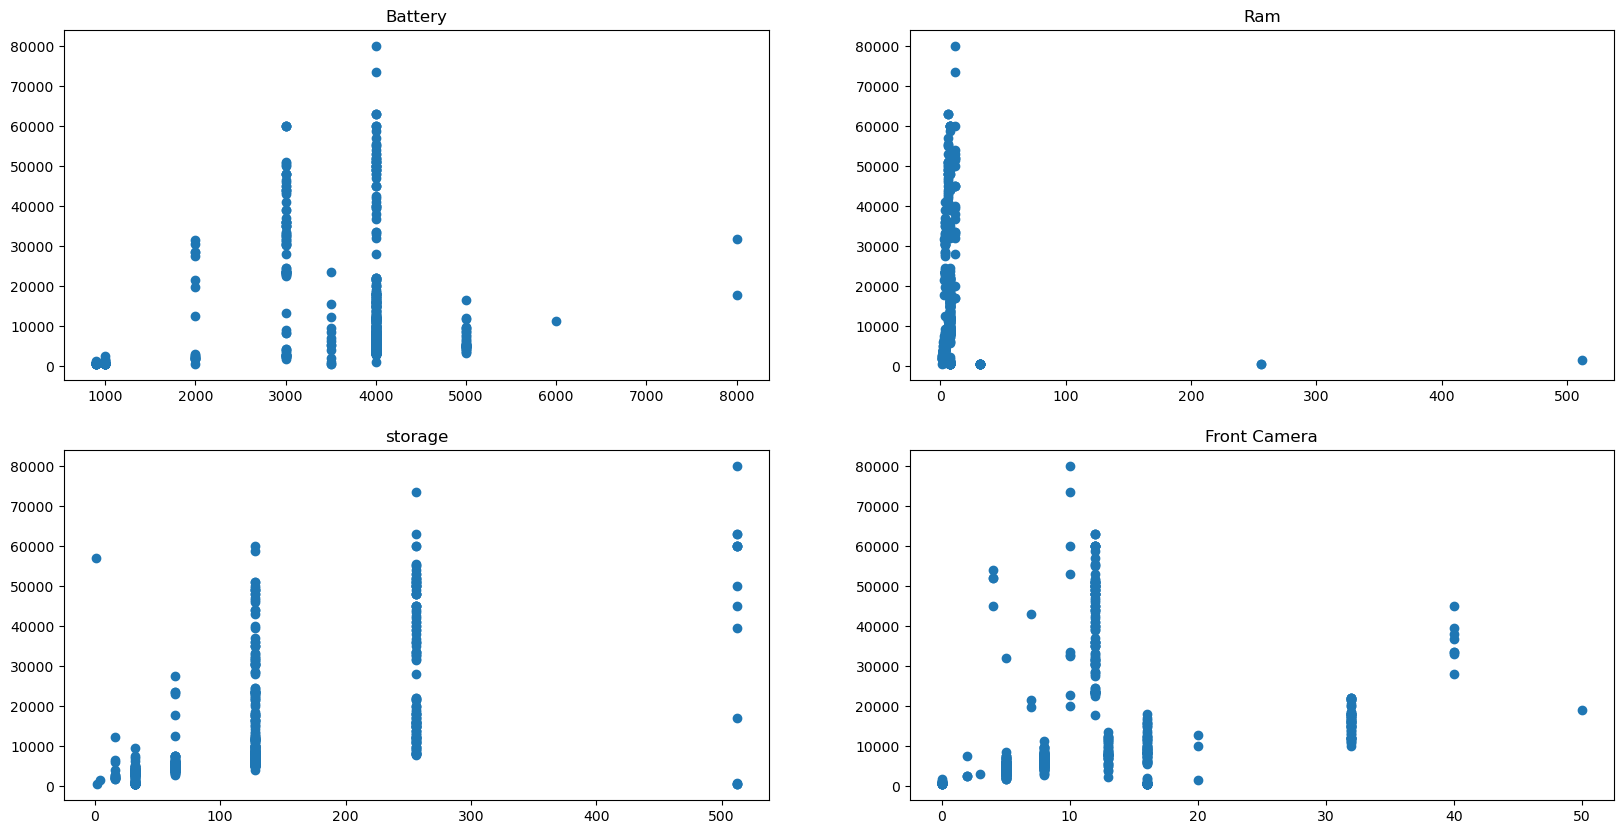

In [245]:
list=['Battery', 'Ram', 'storage', 'Front Camera']
plt.figure(figsize = (20,10))
j=1
for i in list:
    plt.subplot(2,2,j)
    plt.title(f'{i}')
    plt.scatter(data[f'{i}'],data['price in EGY'])
    j+=1

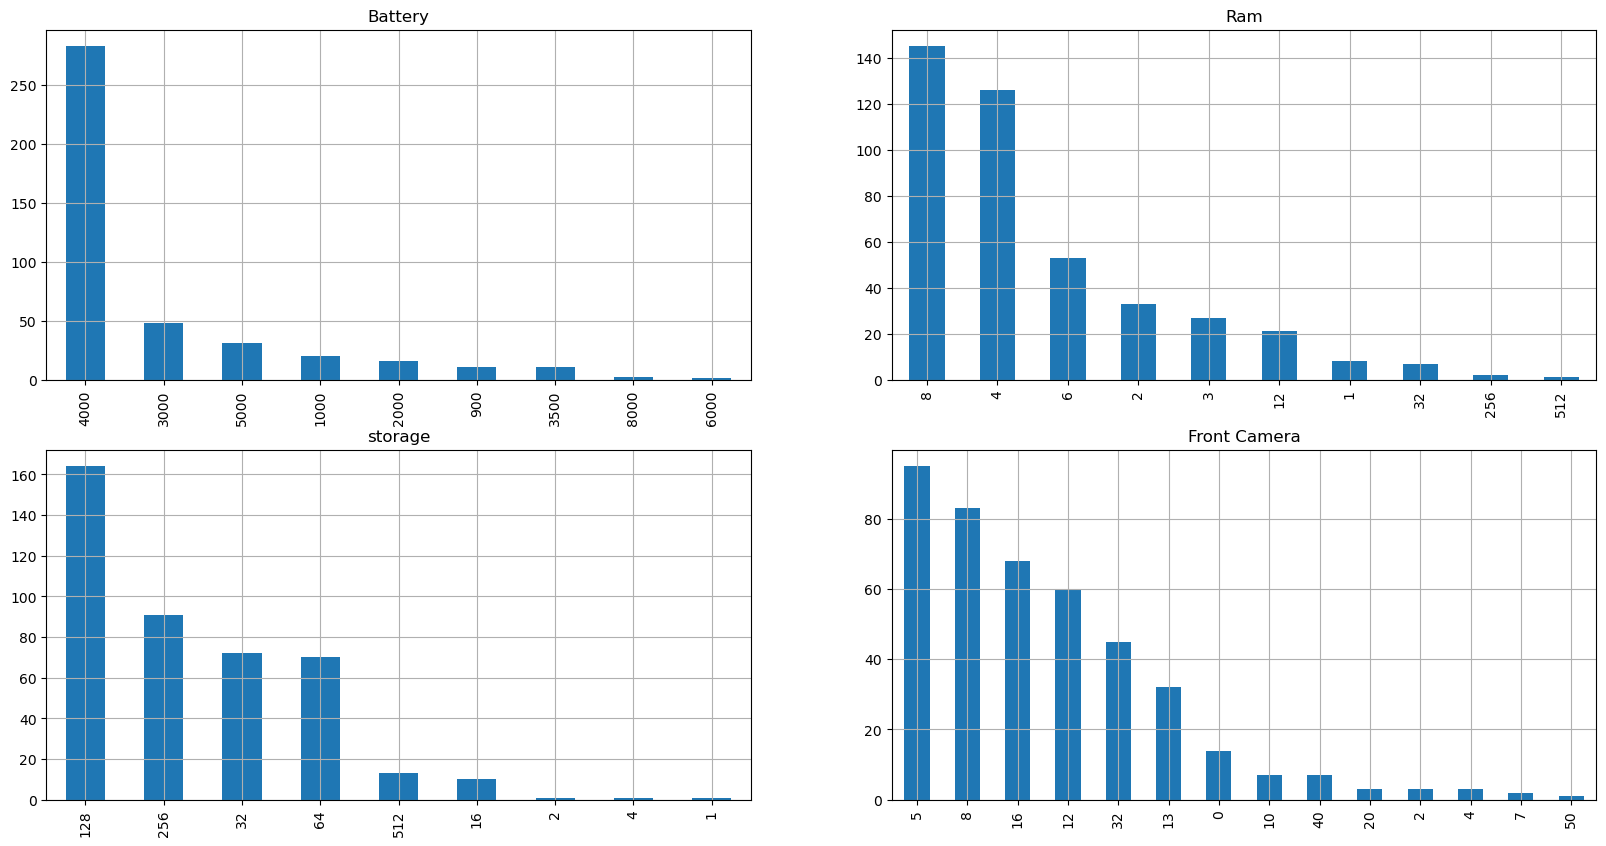

In [248]:
list=['Battery', 'Ram', 'storage', 'Front Camera']
plt.figure(figsize = (20,10))
j=1
for i in list:
    plt.subplot(2,2,j)
    plt.title(f'{i}')
    data.groupby(['price in EGY'])[f'{i}'].max().value_counts().plot.bar(grid=True)
    j+=1

/tmp/ipykernel_6742/2149670811.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

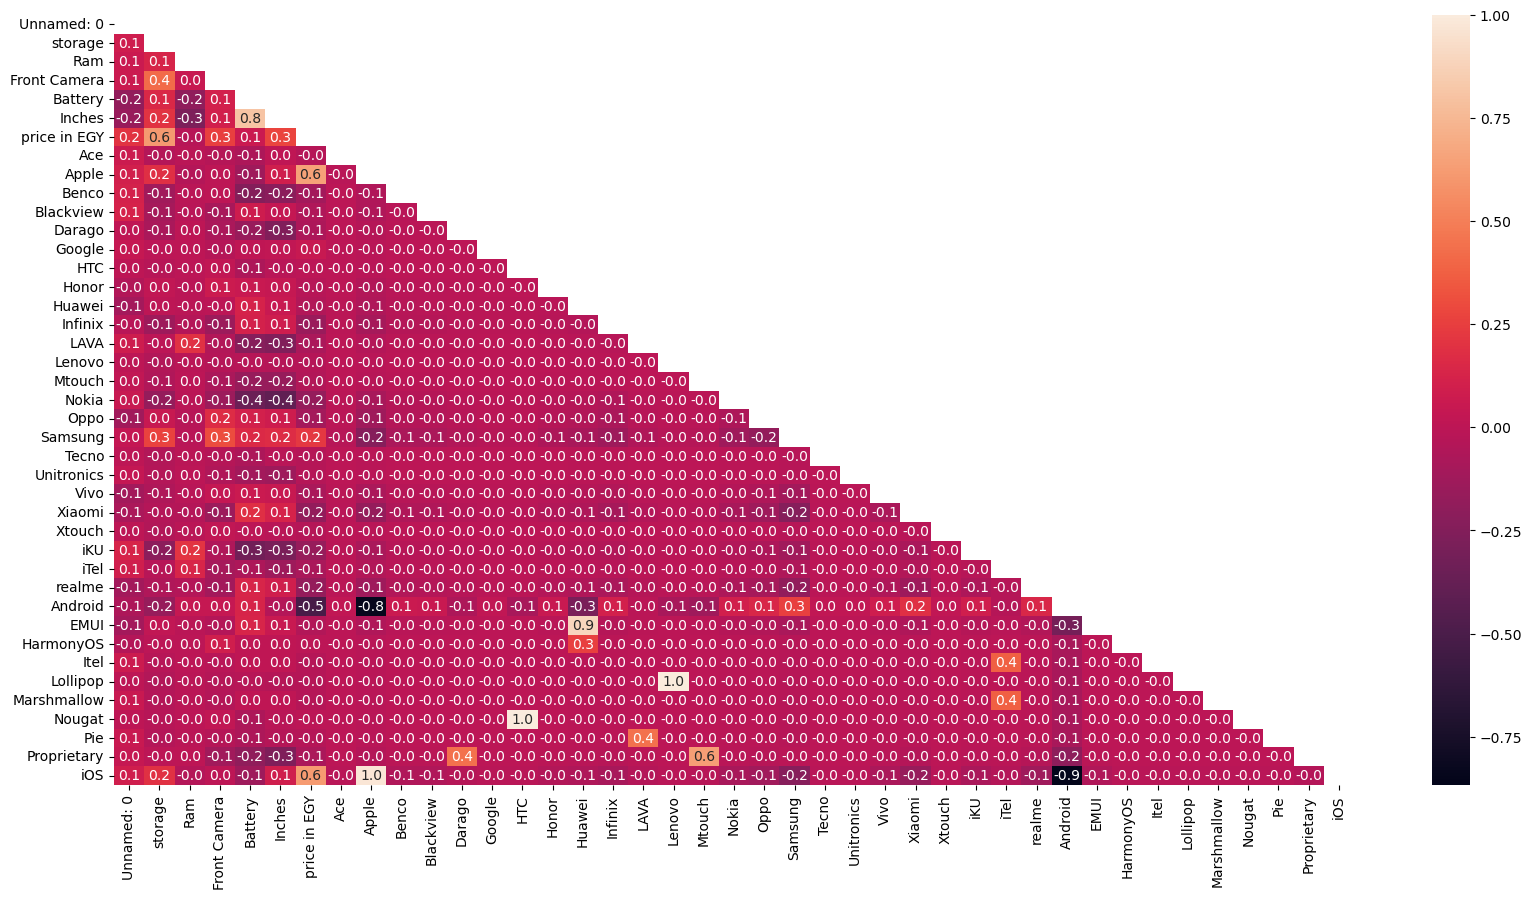

In [238]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),mask = np.triu(data.corr()),annot=True,fmt='.1f')